In [ ]:
import numpy as np
from scipy import stats as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

1. Do a scatterplot of each subject's left telencephalon **(type 1 level 1) volume** by their right (left on the vertical axis and right on the horizontal). The kirby 21 dataset can be found [here](https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby21.csv)


In [ ]:
url = "https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby21.csv"
df = pd.read_csv(url, index_col = 0)
df.head()

,rawid,roi,volume,min,max,mean,std,type,level,id,icv,tbv
1,kirby127a_3_1_ax.img,Telencephalon_L,531111,0.0,374.0,128.3013,51.8593,1,1,127,1378295,1268519
2,kirby127a_3_1_ax.img,Telencephalon_R,543404,0.0,300.0,135.0683,53.6471,1,1,127,1378295,1268519
3,kirby127a_3_1_ax.img,Diencephalon_L,9683,15.0,295.0,193.5488,32.2733,1,1,127,1378295,1268519
4,kirby127a_3_1_ax.img,Diencephalon_R,9678,10.0,335.0,193.7051,32.7869,1,1,127,1378295,1268519
5,kirby127a_3_1_ax.img,Mesencephalon,10268,55.0,307.0,230.8583,29.2249,1,1,127,1378295,1268519


Text(0.5, 1.0, 'Left Vs Right Telencephalon Volume')

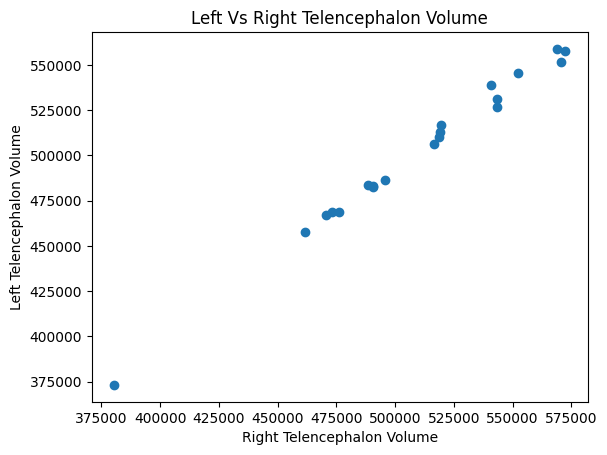

In [ ]:
telL_vol = df.loc[(df['roi'] == 'Telencephalon_L') & (df['type'] == 1) & (df['level'] == 1), 'volume']
telR_vol = df.loc[(df['roi'] == 'Telencephalon_R') & (df['type'] == 1) & (df['level'] == 1), 'volume']
plt.scatter(telR_vol, telL_vol)
plt.xlabel('Right Telencephalon Volume')
plt.ylabel('Left Telencephalon Volume')
plt.title('Left Vs Right Telencephalon Volume')

2. Create a vector of the left telencelphalon **(type 1 level 1) volume** values and the right. Demean each. Fit a regression through the origin model with the left telecephalon as the outcome and the right as the predictor. Also do the same with the left as the predictor and the right as the outcome. Plot the fitted lines on your scatterplot.


In [ ]:
telL_vol = np.array(telL_vol)
telL_vol = telL_vol - np.mean(telL_vol)
telR_vol = np.array(telR_vol)
telR_vol = telR_vol - np.mean(telR_vol)

Text(0.5, 1.0, 'Left Telencephalon Volume Regression')

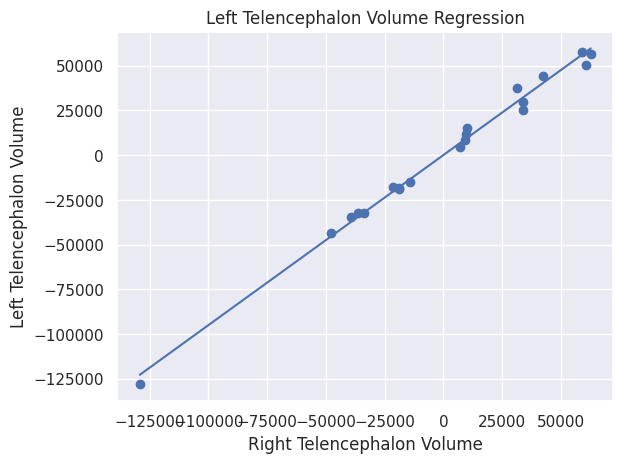

In [ ]:
# Right as predictor
b_r = sum(telL_vol * telR_vol) / sum(telR_vol ** 2 )
t_r = np.array([min(telR_vol), max(telR_vol)])
plt.plot(t_r, t_r * b_r)
plt.scatter(telR_vol, telL_vol)
plt.xlabel('Right Telencephalon Volume')
plt.ylabel('Left Telencephalon Volume')
plt.title('Left Telencephalon Volume Regression')

Text(0.5, 1.0, 'Right Telencephalon Volume Regression')

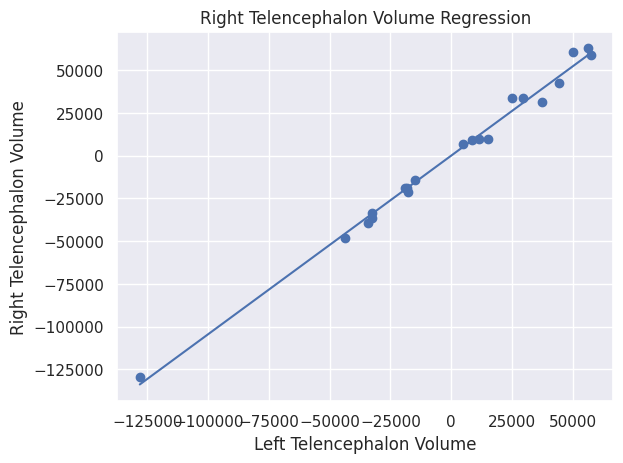

In [ ]:
# Left As Predictor
b_l = sum(telR_vol * telL_vol) / sum(telL_vol ** 2 )
t_l = np.array([min(telL_vol), max(telL_vol)])
plt.plot(t_l, t_l * b_l)
plt.scatter(telL_vol, telR_vol)
plt.xlabel('Left Telencephalon Volume')
plt.ylabel('Right Telencephalon Volume')
plt.title('Right Telencephalon Volume Regression')

3. Consider a regression through the origin model $Y=BX$. What would be the impact on the estimate of $B$ if we replaced $X$ by $cX$ where $c$ is a positive constant?

Answer: B would be scaled down by c (i.e. B -> B * 1/c) in order to maintain the same output (Y).

4. Let $X_i$ be a group indicator so that
$$
X_i = I(i \in G_1)
$$
I.e. takes the value $1$ when $i$ is in group 1 and 0 if $i$ is in group 0. Consider optimizing
$$
\sum_{i=1}^n (Y_i - \beta_0 - \beta_1 X_i)^2.
$$
If $\hat Y = \hat \beta_0 + \hat \beta_1 X$ argue that $\hat Y$ is the group mean for group 1 if $X=1$ and the group mean for group 0 if $X=0$.


Case 1: $X=1$ ($i$ is in group 1)
   - In this case, $\hat{Y} = \hat{\beta}_0 + \hat{\beta}_1 \cdot 1 = \hat{\beta}_0 + \hat{\beta}_1$.
   - When $X=1$, the predicted value $\hat{Y}$ is equal to $\hat{\beta}_0$ plus the effect of $\hat{\beta}_1$. This is the group mean for group 1.

Case 2: $X=0$ ($i$ is in group 0)
   - In this case, $\hat{Y} = \hat{\beta}_0 + \hat{\beta}_1 \cdot 0 = \hat{\beta}_0$.
   - When $X=0$, the predicted value $\hat{Y}$ is equal to $\hat{\beta}_0$. This is the group mean for group 0.

Therefore, $\hat{Y}$ does represent the group mean for group 1 when $X=1$ and the group mean for group 0 when $X=0$.

5. Write a python function that takes an X and Y vector and returns an estimated $\beta_0$ and $\beta_1$ from linear regression using only basic functions such as mean, sd and correlation.


In [ ]:
def lin_reg(X, Y):
  B1 = st.pearsonr(X, Y) * np.std(Y) / np.std(X)
  B0 = np.mean(Y) - np.mean(X) * B1
  return (B1, B0)

6. Argue that if you take the vectors $Y$ and $X$ and divide them by their standard deviations (respectively), the slope for either regressing $Y$ on $X$ or $X$ on $Y$ is simply the correlation. Note formal proof is not required, just the argument.

When you divide $Y$ and $X$ by their standard deviations, they become standardized, which makes the slope of the regression line equal to the correlation between $Y$ and $X$. This is because standardization makes the variables' variances equal to 1, making the slope equal to the correlation coefficient.